# K-means clustering

## Introduction

The K-means algorithm is a distance-based unsupervised machine learning algorithm designed to seperate datapoints into clusters to help understand underlying patterns within the data. The entire process consists of a number of steps. They are:

* The assignment step
* The update step
* The Objective function

The overall goal of the algorithm is to reduce the overall euclidean distance between the datapoints and the centroid. The loss function that drives this algorithm is called Within Cluster Sum of Squares (WC-SSE).

### Initialisation

To initialise the kmeans algorithm, the $K$ value is assigned, telling the algorithm the number of clusters to work with. This can be found by initialising a loop to test a number of $K$ values and then compare the inertia values for each (see inertia section). An example of the plot used to compare can be seen below.

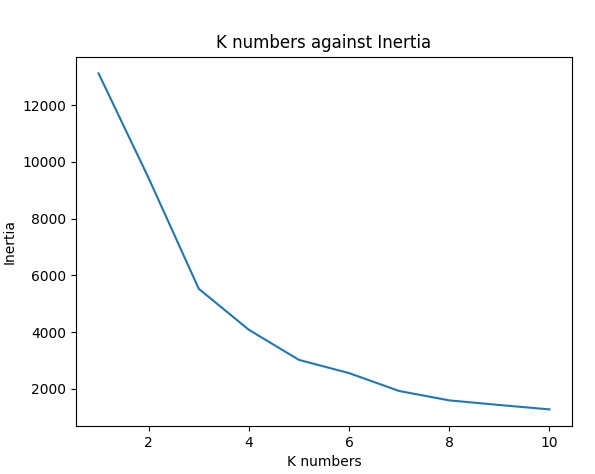

## The assignment step

This step looks at each data point and seeks to attach it to a centroid by finding which centroid is the closest. This happens by calculating the the distance to all and then finding the smallest value. When choosing the initial centroids, these are usually randomly picked datapoints. This can however, be assigned to a specific place (or a random place) although this may lead to slower convergence due to a lack of datapoints in that specific area.

### Mathematical formula

$$x_i \in S_j \iff j = \underset{k}{\arg\min} ||x_i - \mu_k||^2$$

### Explanation

* $x_i$: This is the position vector of a single data point
* $x_i \in S_j$: This means that the datapoint $x_i$ belongs to the cluster $S_j$. This is the final result of the rule.
* $\iff$: This is the mathematical symbol for iff or 'If and only if'. This is a double-sided relationship that establishes a **necessary and sufficient** condition for assignment. In this context it means that a data point can only be assigned to a centroid ($x_i \in S_j$) **if and only if** that cluster provides the minimum squared euclidean distance.
* $j =$: This is the variable that the stores the index of the best cluster
* $\underset{k}{\arg\min}$: This is the argument that minimises. This essentially asks which cluster index ($k$) gives the **minimum** value
* $|| ||$: This designates the euclidean norm. The euclidean norm is the standard way of measuring the length or magnitude of a vector in euclidean space.
* $||x_i - \mu_k||^2$: This is the way of displaying the squared distance. This is minimising the distance between $x_i$ (the data point) and $\mu_k$ (the centroid)

When all of this is combined it spells out the following in standardised mathematical notation. 'A datapoint ($x_i$) is assigned to a cluster ($S_j$) **if and only if** that clusters centre ($\mu_k$) is the closest one to it.

## The update step

The next step is the update step. This is where the algorithm the begins to calculate the mean euclidean distances between the datapoints and move the centroid to ensure it is the lowest possible value. In this movement, the only component that moves is the centroid, none of the datapoints move in this space.

### The mathematical formula

$$\mathbf{\mu}_j^{\text{new}} = \frac{1}{|S_j|} \sum_{\mathbf{x}_i \in S_j} \mathbf{x}_i$$

### Explanation

* $\mathbf{\mu}_j^{\text{new}}$: This is the new centroid location
* $\frac{1}{|S_j|}$: This is the fraction that calculates the mean distance. The pipes (|) are used to indicate **cardinality** in the set. This means that $S_j$ is represented by the total count of datapoints in the cluster not the total.
* $\sum_{\mathbf{x}_i \in S_j} \mathbf{x}_i$: This part is the condition for summation along with the vector being summed. What this is saying is that sum only those vectors ($x_i$) that the elements of ($\in$) the cluster set $S_j$. The final $x_i$ is the term actually being summed.

When this is all done, it will result in a new $\mu_k$ which can then be fed into the objective function as well as used to recalculate the assignment step in the event that the centroid moves position. This is done on a loop until the centroid no longer needs to move due to convergence.

## The objective function

When referring to unsupervised machine learning algorithms, the term loss function is replaced with the term objective function. Whereas the loss function in a supervised machine learning system is there to measure the error between the prediction ($\hat{y}$) and the true value ($y$), an objective function within an unsupervised system measures the error between the datapoint ($x_i$) and the cluster centre ($\mu_k$).

### The mathematical formula

$$WC\text{-}SSE = \sum_{j=1}^{K} \sum_{\mathbf{x}_i \in S_j} ||\mathbf{x}_i - \mathbf{\mu}_j||^2$$

### Explanation

* $WC\text{-}SSE$: This stands for the **Within-Cluster Sum of Squares** and is the objective function that will measure the euclidean distances between the centroid and the datapoints.
* $\sum_{j=1}^{K}$: This is the outer summation that sums the results for all $K$ clusters that are worked out from the inner summation.
* $\sum_{\mathbf{x}_i \in S_j}$: This is the inner summation. This has to be worked out first as this gives the output used for the outer summation. This is the summation that is applied to the euclidean distance calculation. So this sums all of the datapoints ($x_i$) that are elements ($\in$) belonging to a specific cluster ($S_j$)
* $||\mathbf{x}_i - \mathbf{\mu}_j||^2$: This is squared euclidean distance between the datapoint ($x_i$) and the centroid ($\mu_j$). This calculation gives you one single number and then you apply the summation rules for all datapoints.

The algorithm iterates through the following steps.

1. **Initialisation** - The algorithm randomly selects $K$ initial centroids ($\mu_j$)
2. **Assignment** - The cycle begins here. The algorithm performs the assignment (E-step) step where all datapoints are assigned to the closest centroid.
3. **Update** - The algorithm then performs the update step (M-step) where the centroids are moved to the location where the mean euclidean distance is shortest between the datapoints and the centroid.
4. **Convergence check (The objective function)** - It calculates the objective function based on the new centroid locations. It compares the position from $\mathbf{\mu}_j^{\text{new}}$ to the position from $\mathbf{\mu}_j^{\text{old}}$
5. **Loop or stop** - If there has been significant movement from the centroids, the algorithm moves back to step 2 using the new, relocated centroids. If the centroids have moved negligably, the algorithm has converged and is stopped.

## The elbow method (determining $K$)

One method of determining the number of clusters to use is called the elblow method. This is where you loop the K-Means algorithm through a number of different clusters (e.g. 1-10) and then select the optimum number.

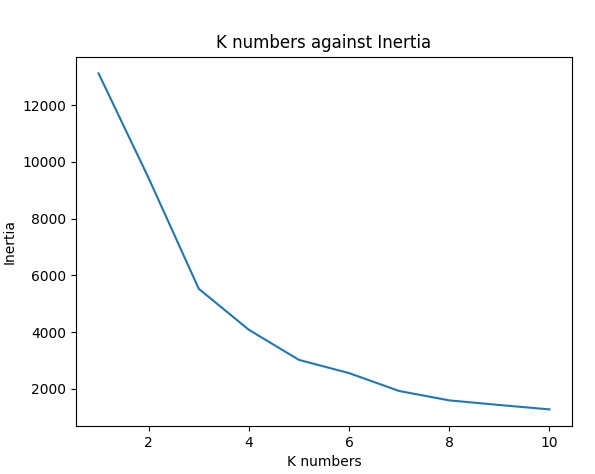

So loopking at the figure above, you can see an 'elbow' around the 3rd cluster, which is where the $K$ number is selected. Along the $y$ axis is the intertia.

## Alternative $K$ selection

There are a number of different methods of selecting $K$.

* **Random datapoints** - This is the standard method of selecting $K$. Here random datapoints are selected to serve as initial centroids $\mu_j$. This works because it ensures that the centroid is within the density of the actual data.
* **Random values in space** - This is another method where $K$ are random coordinate values within the min/max range. This however is riskier as the randomly chosen point might not be near any data therefore it will take much longer to converge.
* **K-Means++** - In modern libraries such as scikit-learn this is often the default method. It first chooses a random datapoint but then after chooses centroids far away. This leads to faster convergence and better overall results than standard methods. This works because once the distance calculation is complete, a new centroid is selected and there is a bias towards datapoints that are further away from the existing one.